In [2]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
from sklearn import datasets
%matplotlib inline

In [4]:
sess = tf.Session()

In [71]:
#load data. 
iris = datasets.load_iris()
x_vals = iris.data[:,[0,3]]#1st and 4th variables of the dataset is sepal length and sepal width
y_vals = np.array([1 if y ==0 else -1 for y in iris.target]).reshape(150,1)#l.setosa=>1, -1 otherwise

In [72]:
#split into train and test data
train_indices = np.random.choice(len(x_vals), round(len(x_vals) * 0.7), replace = False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [73]:
#batch size, variables and placeholders
batch_size = 100

x_data = tf.placeholder(dtype=tf.float32, shape=[None,2])
y_target = tf.placeholder(dtype=tf.float32, shape=[None,1])

A = tf.Variable(tf.random_normal(shape=[2,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [74]:
#model output
model_output = tf.subtract(tf.matmul(x_data, A),b)

In [75]:
#L2 norm of a vector,classification loss etc
l2_norm = tf.reduce_sum(tf.square(A))

alpha = tf.constant([0.1])

classification_term = tf.reduce_mean(tf.maximum(0., tf.subtract(1., tf.multiply(model_output,y_target))))

loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [76]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [77]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

init = tf.initialize_all_variables()
sess.run(init)

In [86]:
#train
loss_vec = []
train_accuracy = []
test_accuracy = []

for i in range(500):
    rand_index = np.random.choice(len(x_vals_train),size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = y_vals_train[rand_index]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target:y_vals_train})
    train_accuracy.append(train_acc_temp)
    
    test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: y_vals_test})
    test_accuracy.append(test_acc_temp)
    
    if(i+1)%100 == 0:
        print('Step # ' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step # 100 A = [[ 0.16128981]
 [-1.3317871 ]] b = [[3.8582206e-05]]
Loss = [0.40570694]
Step # 200 A = [[ 0.15671311]
 [-1.3310941 ]] b = [[-0.0627614]]
Loss = [0.4205935]
Step # 300 A = [[ 0.1501374]
 [-1.3425184]] b = [[-0.1266614]]
Loss = [0.40106067]
Step # 400 A = [[ 0.13537513]
 [-1.3393527 ]] b = [[-0.18626146]]
Loss = [0.4397025]
Step # 500 A = [[ 0.1359521]
 [-1.3445215]] b = [[-0.2507615]]
Loss = [0.38393593]


In [88]:
[[a1] , [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2/a1
y_intercept = b/a1

x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope*i+y_intercept)

setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i] == 1]
setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i] == 1]
not_setosa_x = [d[1] for i,d in enumerate(x_vals) if y_vals[i] == -1]
not_setosa_y = [d[0] for i,d in enumerate(x_vals) if y_vals[i] == -1]

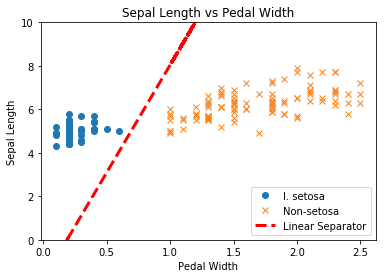

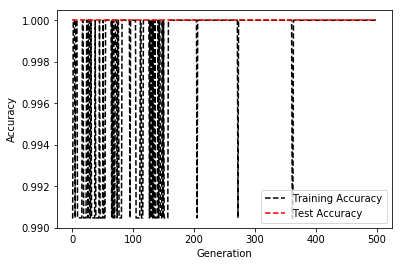

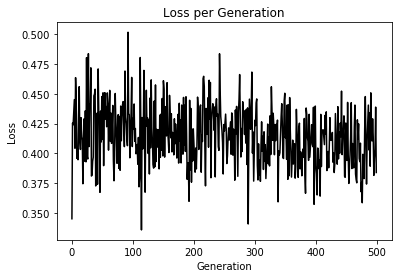

In [96]:
#plot
plt.plot(setosa_x, setosa_y, 'o', label ='I. setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals,best_fit,'r--',label='Linear Separator',linewidth = 3)
plt.ylim([0,10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

plt.plot(train_accuracy,'k--',label='Training Accuracy')
plt.plot(test_accuracy,'r--',label='Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()